In [2]:
import database_handler as db
import pandas as pd
import lookups
import pandas_data_handler
import matplotlib.pyplot as plt
from transformers import pipeline

In [2]:
tweets=pandas_data_handler.download_csv_to_dataframe(lookups.CsvUrlTweets.ELON_MUSK_TWEETS)
doge=pd.read_csv(r"C:\Users\Lenovo\Desktop\dogecoin_prices_2021.csv")

column is not a date format=Parser must be a string or character stream, not float64
column is not a date format=Unknown string format: @PPathole Dojo isnât needed, but will make self-driving better. It isnât enough to be safer than human drivers, Autopilot ultimately needs to be more than 10 times safer than human drivers. present at position 0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5736\3828651029.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_tweets['month'] = doge_tweets['Datetime'].dt.month
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


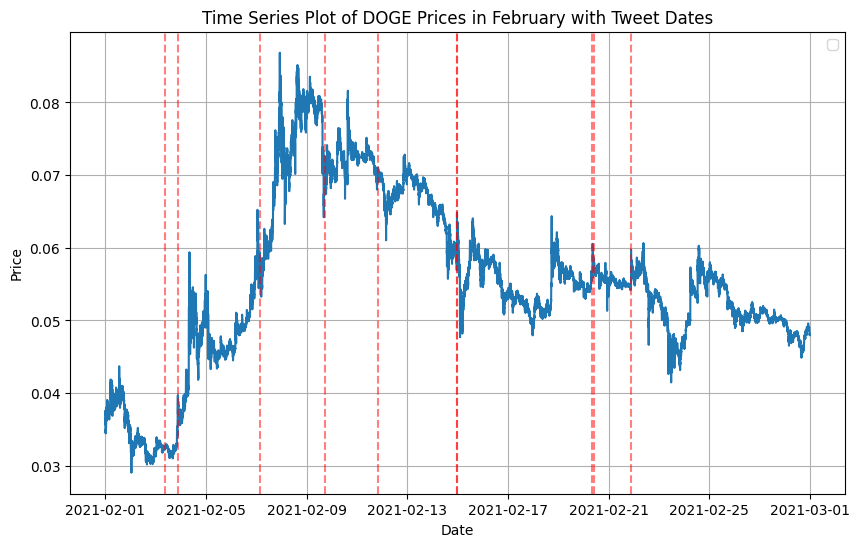

In [4]:
# Convert 'Datetime' to datetime format
tweets['Datetime'] = pd.to_datetime(tweets['Datetime'], format='%d/%m/%Y %H:%M')

# Convert 'Text' to lowercase
tweets['Text'] = tweets['Text'].str.lower()

# Keep only the rows where 'Text' contains "doge"
doge_tweets = tweets[tweets['Text'].str.contains('doge')]

# Extract the month from 'Datetime'
doge_tweets['month'] = doge_tweets['Datetime'].dt.month

# Filter 'doge_tweets' for February tweets
feb_tweets = doge_tweets[doge_tweets['month'] == 2]

# Ensure 'open_time' is in datetime format in 'doge' dataframe
doge['open_time'] = pd.to_datetime(doge['open_time'], format='%d/%m/%Y %H:%M')

# Set 'open_time' as index
doge.set_index('open_time', inplace=True)

# Filter 'doge' for February data
doge_feb = doge[doge.index.month == 2]

# Create a time series plot of 'price' for February
plt.figure(figsize=(10, 6))
plt.plot(doge_feb.index, doge_feb['price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series Plot of DOGE Prices in February with Tweet Dates')

# Add red vertical lines for February tweet dates
for tweet_date in feb_tweets['Datetime']:
    plt.axvline(x=tweet_date, color='r', linestyle='--', alpha=0.5)

plt.legend()
plt.grid(True)
plt.show()